In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
energyData = pd.read_csv('cleaned.csv')
energyData.head()

,population,gdp,clean_cons_per_capita,clean_consumption,clean_share_energy,fossil_cons_per_capita,fossil_consumption,fossil_share_energy,electricity_demand,energy_per_gdp
0,30774624.0,2.090000e+11,5.189,0.160,0.530,9741.336,299.786,99.948,23.82,1.438
1,31200984.0,2.230000e+11,6.497,0.230,0.650,9955.142,31.610,99.935,24.98,1.391
2,31624700.0,2.450000e+11,5.261,0.166,0.520,1175.890,321.784,99.948,25.97,1.312
3,32055882.0,2.740000e+11,23.975,0.769,0.228,1486.486,336.154,99.772,27.82,1.232
4,32510184.0,2.970000e+11,22.248,0.723,0.270,1736.774,349.540,99.793,29.40,1.179


In [3]:
# Extract Response and Predictors for Group 1
y_1 = energyData['electricity_demand']
X_1 = energyData[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp']]

# Split the Dataset into Train and Test
X3_train, X3_test, y3_train, y3_test = train_test_split(X_1, y_1, test_size=0.25)
# Fit the linear regression model
linreg1 = LinearRegression()
linreg1.fit(X3_train, y3_train)

LinearRegression()

In [4]:
print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

Intercept 	: b =  -68.53356479644557
Coefficients 	: a =  [ 7.98956544e-08  2.23192644e-10  6.29213690e-04  1.36866008e-01
 -5.32258484e-01 -2.64174086e-05  2.31348193e-02 -3.44741169e-01
  3.56488305e+01]


In [5]:
energy_train_pred = linreg1.predict(X3_train)
energy_test_pred = linreg1.predict(X3_test)

In [8]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X3_train, y3_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y3_train, energy_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X3_test, y3_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y3_test, energy_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9638235645516349
Mean Squared Error (MSE) 	: 13004.468019515063

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9405177603778234
Mean Squared Error (MSE) 	: 30432.190214485734



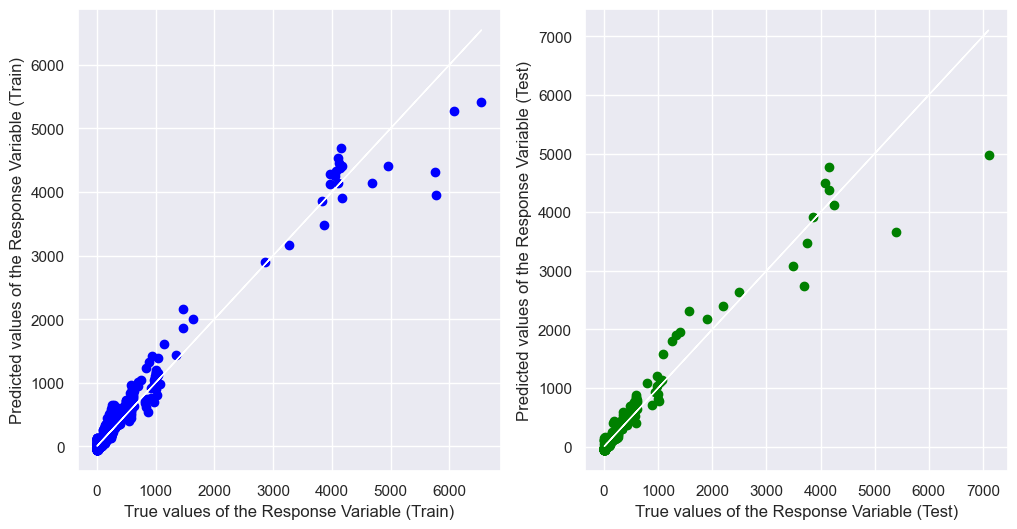

In [9]:
# Plot the Predictions vs the True values for group 1
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y3_train, energy_train_pred, color = "blue")
axes[0].plot(y3_train, y3_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y3_test, energy_test_pred, color = "green")
axes[1].plot(y3_test, y3_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()